# Classification example

Experimental data used for binary classification (room occupancy) from Temperature,Humidity,Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.

## Import Data

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_table('datatraining-Occupancy.txt',sep=",")

In [3]:
dataset.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


## Clean Data

In [4]:
# The data is already clean!

## Explore Data

In [5]:
import matplotlib.pyplot as plt

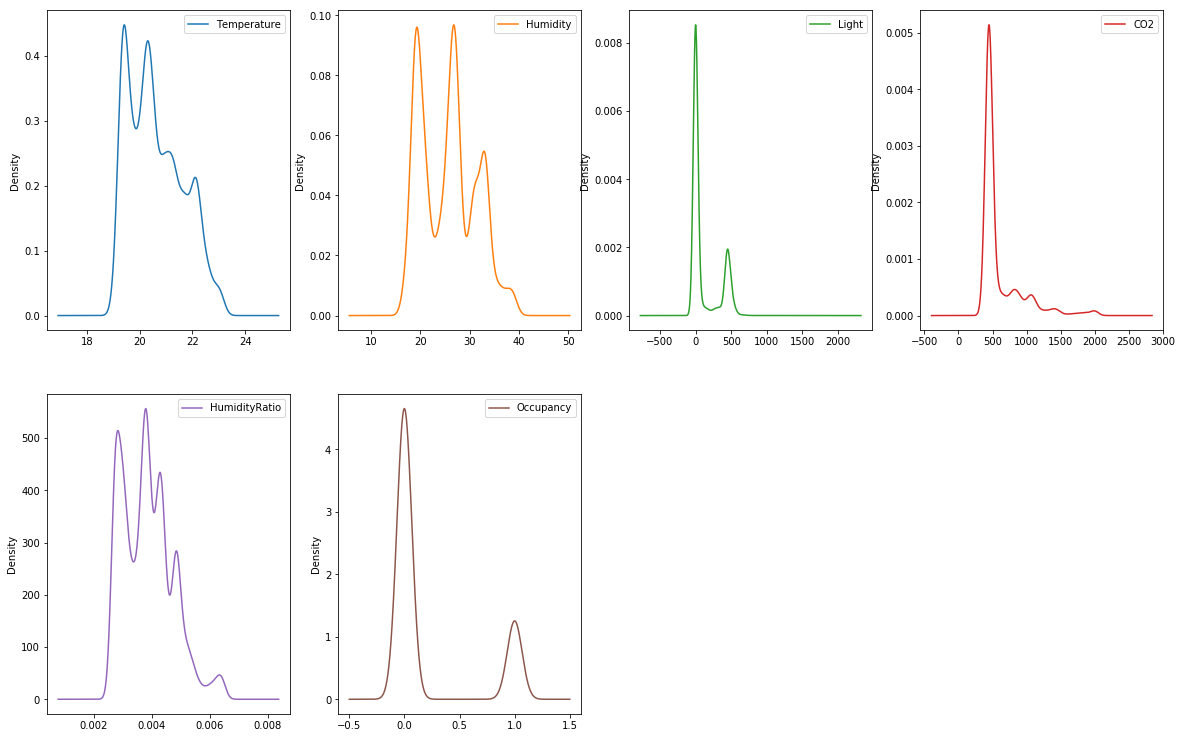

In [6]:
# each variable
dataset.plot(kind='density', subplots=True, layout=(3,4), sharex=False, sharey=False,figsize=(20,20))
plt.show()

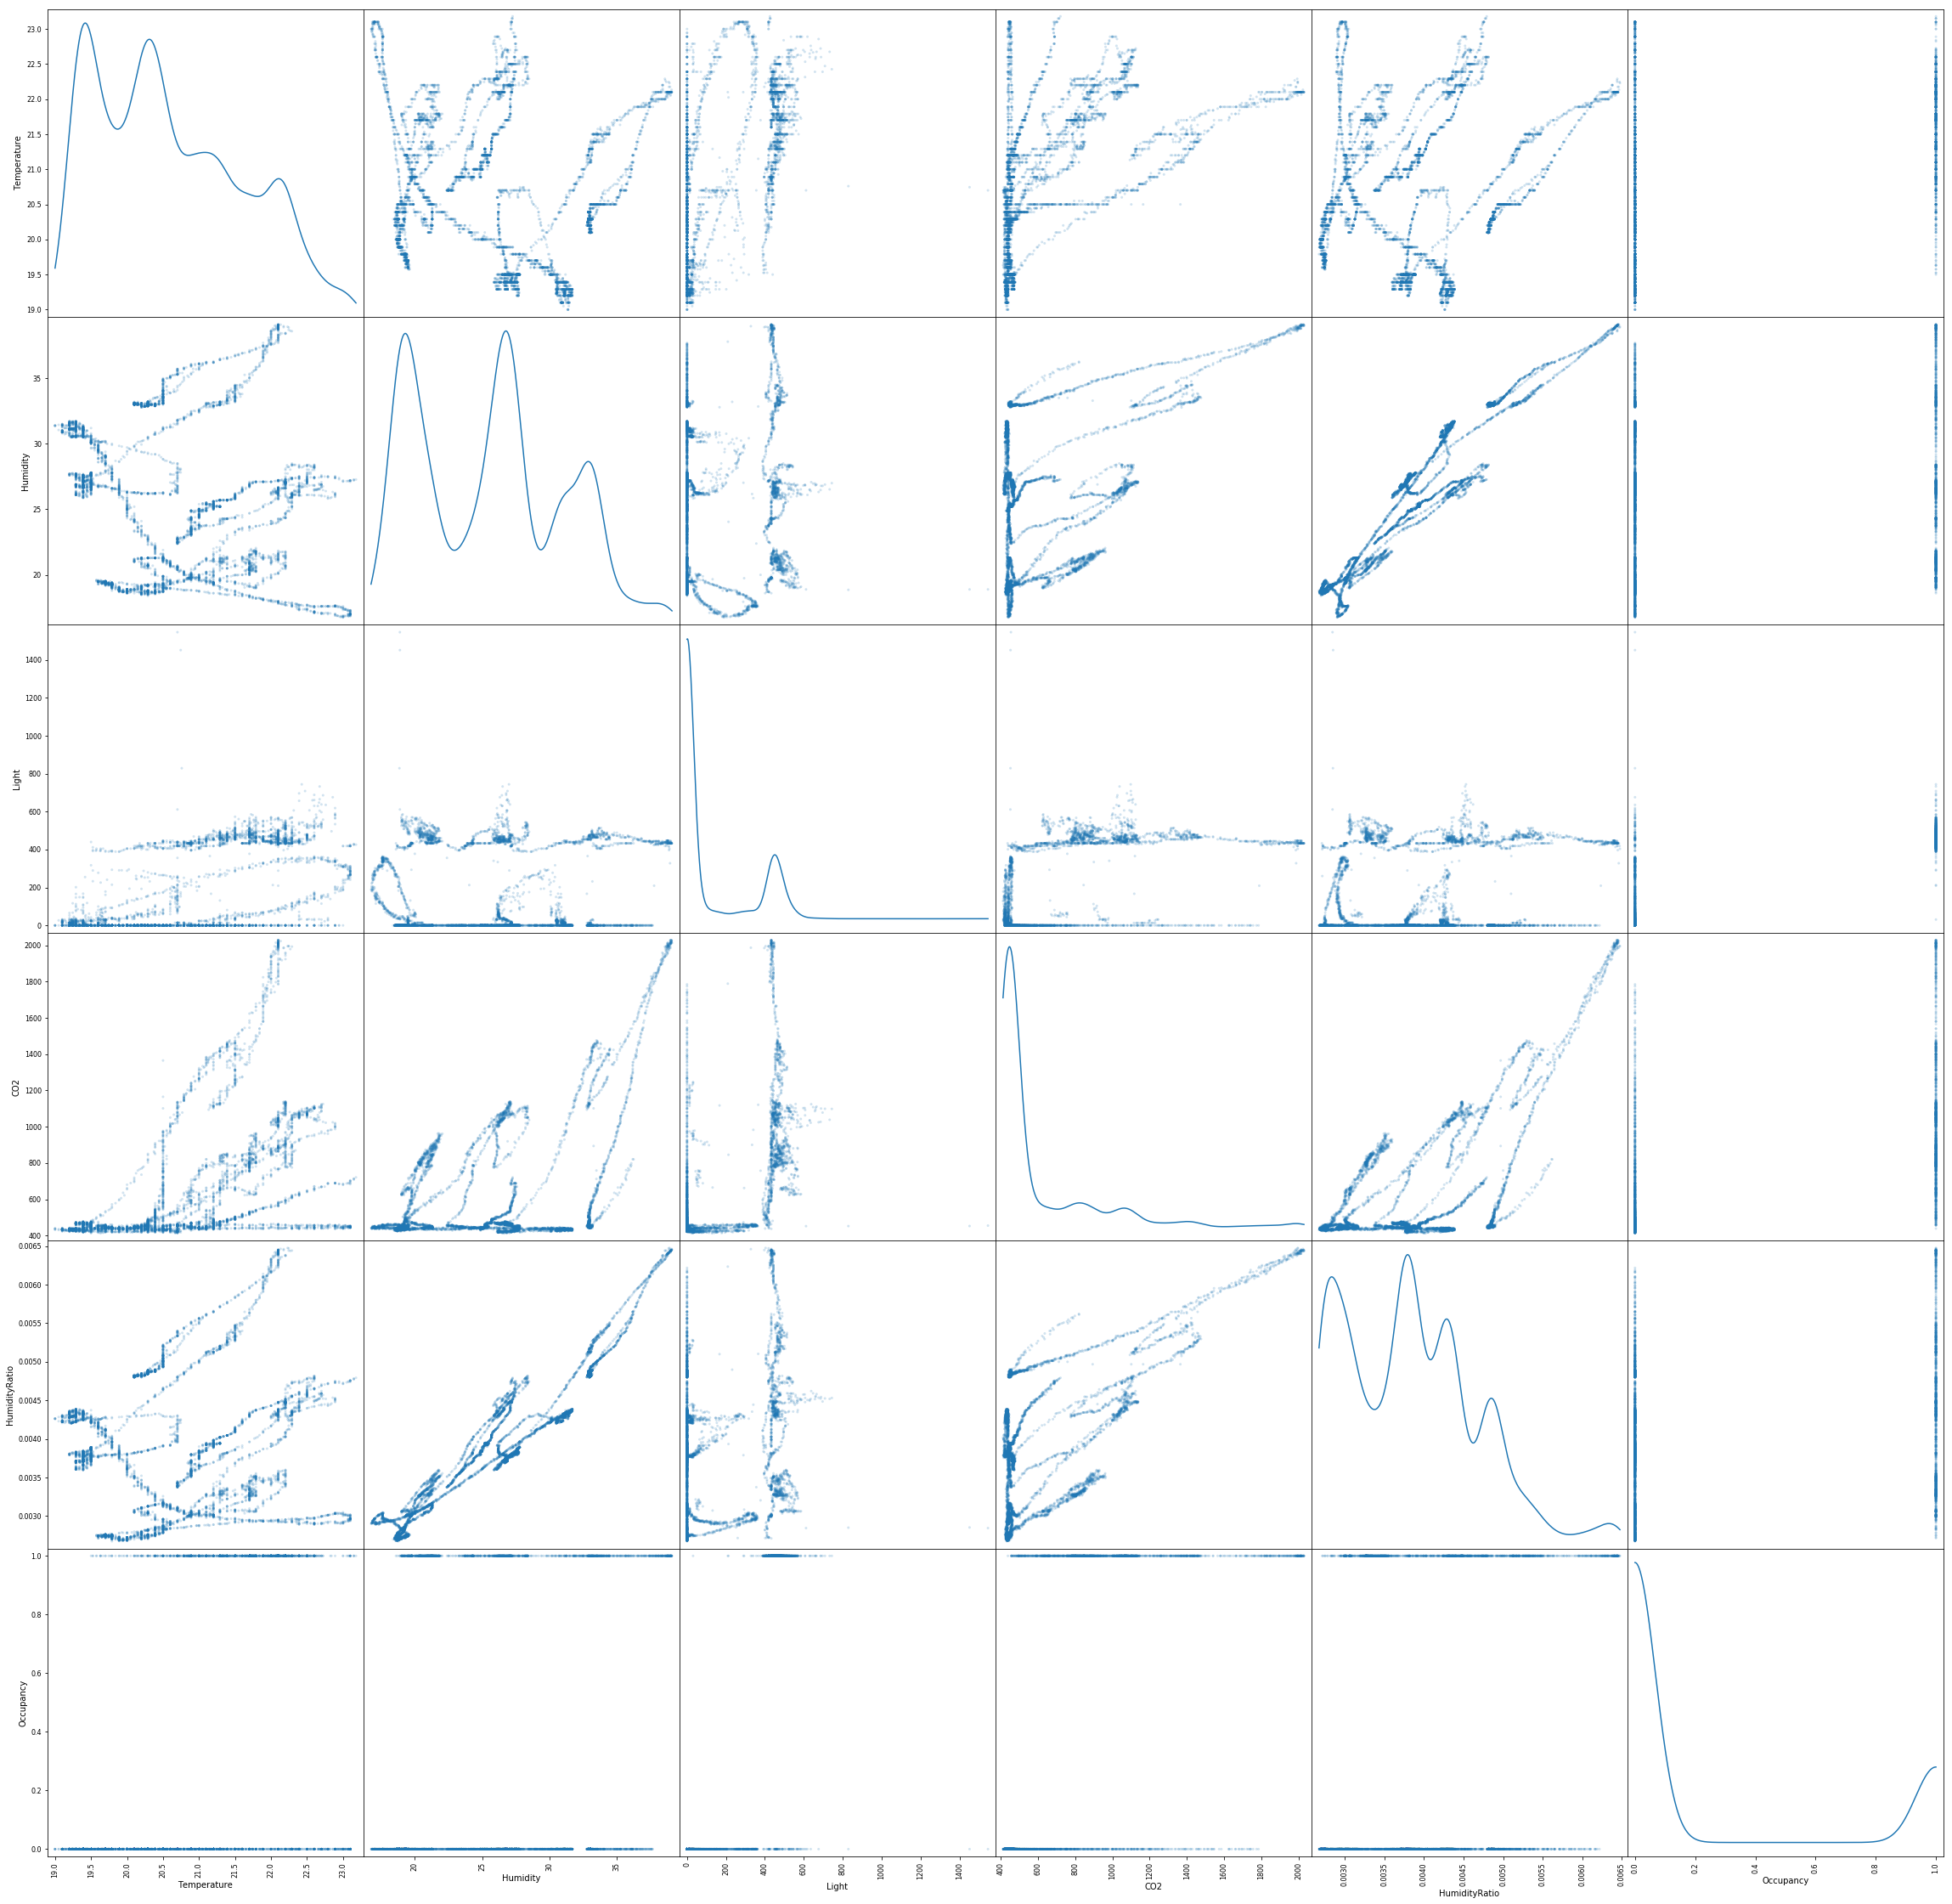

In [7]:
# correlations?
pd.plotting.scatter_matrix(dataset,alpha=0.2, figsize=(40, 40), diagonal='kde')
plt.show()

## Split Data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X=dataset[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
y=dataset['Occupancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Model training

In [10]:
from sklearn import linear_model

In [11]:
model = linear_model.LogisticRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Test and Evaluate

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
# Make predictions using the testing set
y_predictions = model.predict(X_test)

# Metrics
print('Confusion matrix')
print(confusion_matrix(y_test, y_predictions))

print('\nclassification report')
print(classification_report(y_test, y_predictions))

Confusion matrix
[[1267   19]
 [   0  343]]

classification report
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      1286
          1       0.95      1.00      0.97       343

avg / total       0.99      0.99      0.99      1629



## Exercise

1. How would you implement crossvalidation? search and try!
2. Can you use another model for this classification? try another one.
3. what would the results be if you used the other datasets for training and testing?